<a href="https://colab.research.google.com/github/SWEN90006/tutorials/blob/main/SWEN90006_Tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SWEN90006 Tutorial 3

## Introduction
The aim of this tutorial is for you to familiarise yourself with the
various coverage criteria and analysis of the program for the various
coverage criteria. When you get back to your revision you should try
comparing the test cases that you derive for a program using different
techniques.

The different type of program that we encounter this week is a numerical
program. One of the challenges of numerical programs is that we can
never be certain that we will get an *exact* answer to our computation.
Instead what we typically require is an answer to within some *error*
value. (Recall from the lecture notes that an error is the difference between a computed value and the exact value). Numerical programs are tricky to debug, because they are
often used to *find* the answer to some problem in the first place. For
example, solving some integration or differentiation problems is too
hard to do by hand and so we use a *numerical* method to approximate the
answer.

## Working With the Program
The program implements the standard bisection method for root finding.
The root-finding problem is expressed as follows:

> We are given a function $f(x)$ taking a real number and returning a
> real number; that is a function $f: \mathbb{R} \rightarrow \mathbb{R}$. The function is negative at some point $x_0$ and
> positive at some point $x_1$. Find the value $x$ for which $f(x) = 0$
> on an interval $[Lower,Upper]$. The point $x$ is a root of $f$ on the
> interval $[Lower,Upper]$.

As an example, consider the natural logarithm function, $ln$. The graph
in Figure 1 shows the values of $ln(x)$ for various values
of $x$. We can see that the value of $ln(x)$ is equal to 0 when $x=1$.
The bisection algorithm finds this value of $x$.


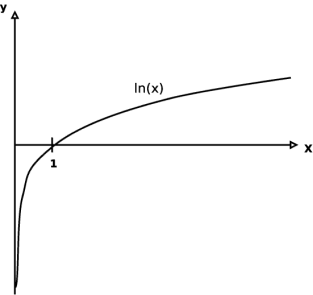

<center>Figure 1: Root finding problems.</center>

The idea behind the algorithm for finding roots is to look at the
interval $[Lower,Upper]$ and bisect it (hence the name of the algorithm)
and find the midpoint of the interval $x_r$. If we know that
$f(\mathit{Lower})$ is negative, and $f(\mathit{Upper})$ is positive
then there must be root in the interval, provided that the function is
continuous. If the value of $f$ at $x_r$ is positive then the root must
be in the interval $[Lower,x_r]$. If the value of $f$ at $x_r$ is
negative then the root must be in the interval $[x_r,Upper]$. The
algorithm should converge to the root because the length of the interval
is getting smaller every time (in fact the length of the interval is
halved every time). Does this sound familiar?

## Your Tasks

1. What is the input domain for the `Bisection` program below?


2. Draw the control-flow graph for the `Bisection` function. You may break the function up into basic blocks to simplify your CFG.

    **Recall** that a *basic block* is a continuous sequence of statements where control flows from one statement to the next, a single point of entry, a single point of exit and no branches or loops.


3. Suppose that we concentrated on the (nice and linear) function $f(x) = x - 2$. Derive a set of test cases that achieve:
    - Statement coverage; and
    - Condition coverage.
    
    Note that you will have to determine what it means for the `Bisection` function to return the *correct* or *expected* output first.

4. **Extended task**: After the tutorial, try implementing the tests in the JUnit driver below.

## The Program


### Prepare the Java Kernel
Since Java is not natively supported by Colab, we need to run the following code to enable Java kernel on Colab.

1. Run the cell bellow (click it and press Shift+Enter),
2. Refresh the Notebook (F5)
3. Change the kernel to Java (Runtime -> Change Runtime Type -> Java)

In [ ]:
!wget https://github.com/SpencerPark/IJava/releases/download/v1.3.0/ijava-1.3.0.zip
!unzip ijava-1.3.0.zip
!python install.py --sys-prefix

In [ ]:
%%loadFromPOM

<dependency>
  <groupId>junit</groupId>
  <artifactId>junit</artifactId>
  <version>4.13.2</version>
</dependency>

The following is a basic Java implementation of `Bisection`.

In [ ]:
public class Bisection{

    static final int MAX_INT = 65535;
    
    static double bisection(double lower, double upper, double error, int max) {
        
        double sign = 0.0; /* Test for the sign of the midpoint xr. */
        double ea = MAX_INT; /* Calculated error value. */
        double xrold = 0.0; /* Previous estimate. */
        double xr = 0.0; /* Current x estimate for the root. */
        double fr = 0.0; /* Current value of f. */
        double fl = 0.0; /* Value of f at the lower end of the interval. */
        int iteration = 0; /* For keeping track of the number of iterations. */
        
        fl = func(lower);
        while ((ea > error && iteration < max)) {
            
            /* Start by memorising the old estimate in xrold and then calculate
            the new estimate and store in fr */
            xrold = xr;
            xr = (lower + upper) / 2;
            fr = func(xr);
            iteration++;
            /* Estimate the percentage error and store in ea. */
            if (xr != 0) {
                ea = Math.abs((xr - xrold)/xr) * 100;
            }
            
            /* To know whether fr has the same sign as f(Lower) or f(Upper) is easy:
            we know that f(Lower) is negative and we know that f(Upper) is positive.
            Multiple fr by f(Lower) and if the result is positive then fr must be
            negative. If the result is negative then fr must be positive. */
            
            sign = func(lower) * fr;
            if (sign < 0)
                upper = xr;
            else if (sign > 0)
                lower = xr;
            else
                ea = 0;
            System.out.println(String.format("iteration %d = (%f, %f, %f, %f, %f)\n", iteration, lower, upper, xr, ea, sign));
        }
        return xr;
    }
    
    static double func(double x) {
        return x - 2;
    }
}

## JUnit test script

The following code block is a JUnit test script. JUnit is a unit-testing framework for Java that allows you to easily create tests that can be run automatically. 

In the code block below, put your test cases where is says "Your test cases start here". Add test cases by adding new elements to the data array. These will then be executed automatically by JUnit.

In [ ]:
import java.util.Arrays;
import java.util.Collection;

import org.junit.Test;
import org.junit.runner.JUnitCore;
import org.junit.runner.Result;
import org.junit.runner.RunWith;
import org.junit.runner.notification.Failure;
import org.junit.runners.Parameterized;

import junit.framework.TestCase;

@RunWith(Parameterized.class)
public class TestBisection extends TestCase {
    
    @Parameterized.Parameter(0)
    public double lower;
    @Parameterized.Parameter(1)
    public double upper;
    @Parameterized.Parameter(2)
    public double error;
    @Parameterized.Parameter(3)
    public int max;
    @Parameterized.Parameter(4)
    public double results;

    @Parameterized.Parameters(name = "{index}: lower: {0} upper:{1} error:{2} iterations:{3} results:{5}")
    public static Collection<Object[]> data() {
        Object[][] data = new Object[][]{
            // Your Test cases start here
            // Please follow the pattern: lower, upper, error, iterations, expected results
            {-1.0, 7.0, 1, 10, 2.0},
            {-1.0, 7.0, 1, 10, 2.0}
            // Your Test cases end here
            };
        return Arrays.asList(data);
    }

    @Test
    public void testBisection() {
        assertEquals(results, Bisection.bisection(lower, upper, error, max));
    }
}

In [ ]:
Result result = JUnitCore.runClasses(TestBisection.class);
for (Failure failure : result.getFailures()) {
     System.out.println(failure.toString());
}
System.out.println(String.format("Total run count: %s, Failed run count: %s", result.getRunCount(), result.getFailureCount()));

iteration 1 = (-1.000000, 3.000000, 3.000000, 100.000000, -3.000000)

iteration 2 = (1.000000, 3.000000, 1.000000, 200.000000, 3.000000)

iteration 3 = (1.000000, 3.000000, 2.000000, 0.000000, -0.000000)

iteration 1 = (-1.000000, 3.000000, 3.000000, 100.000000, -3.000000)

iteration 2 = (1.000000, 3.000000, 1.000000, 200.000000, 3.000000)

iteration 3 = (1.000000, 3.000000, 2.000000, 0.000000, -0.000000)

Total run count: 2, Failed run count: 0
